In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fertilizer-prediction/Fertilizer Prediction.csv


IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('../input/fertilizer-prediction/Fertilizer Prediction.csv')
df

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP


In [4]:
df.shape

(99, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [6]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


CHECKING FOR NULL VALUES

In [7]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [8]:
df.nunique()

Temparature        14
Humidity           13
Moisture           41
Soil Type           5
Crop Type          11
Nitrogen           24
Potassium          13
Phosphorous        32
Fertilizer Name     7
dtype: int64

In [9]:
df.dtypes[df.dtypes =='int64']

Temparature    int64
Humidity       int64
Moisture       int64
Nitrogen       int64
Potassium      int64
Phosphorous    int64
dtype: object

In [10]:
df.dtypes[df.dtypes =='object']

Soil Type          object
Crop Type          object
Fertilizer Name    object
dtype: object

ANALYSING THE TARGET CLASS

In [11]:
df['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [12]:
df['Fertilizer Name'].value_counts()

Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: Fertilizer Name, dtype: int64

EDA

<AxesSubplot:xlabel='Fertilizer Name', ylabel='count'>

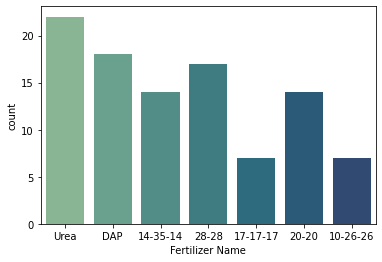

In [13]:
sns.countplot(df['Fertilizer Name'],palette="crest")

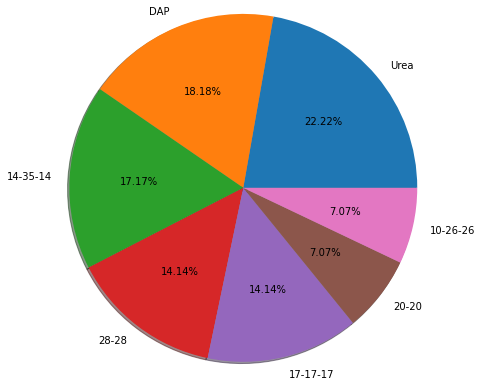

In [14]:
labels= 'Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20','10-26-26'
fig,ax=plt.subplots()
ax.pie(df['Fertilizer Name'].value_counts(),labels=labels,radius=2,autopct='%1.2f%%', shadow=True)
plt.show()

In [15]:
df['Soil Type'].value_counts()

Loamy     21
Sandy     20
Clayey    20
Black     19
Red       19
Name: Soil Type, dtype: int64

<AxesSubplot:xlabel='Soil Type', ylabel='count'>

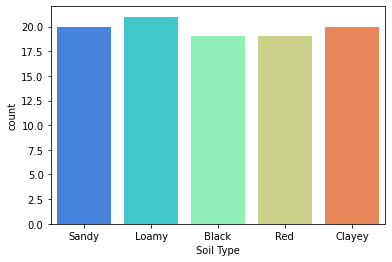

In [16]:
sns.countplot(df['Soil Type'],palette="rainbow")

In [17]:
df['Crop Type'].value_counts()

Sugarcane      13
Cotton         12
Millets        11
Paddy          10
Pulses         10
Wheat           9
Tobacco         7
Barley          7
Oil seeds       7
Ground Nuts     7
Maize           6
Name: Crop Type, dtype: int64

<AxesSubplot:xlabel='Crop Type', ylabel='count'>

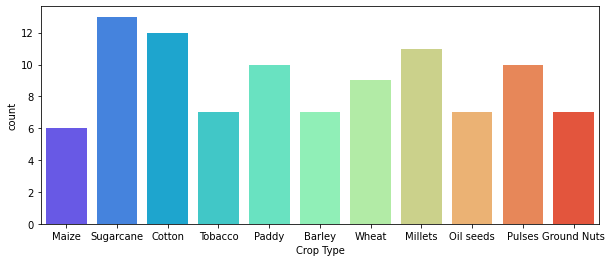

In [18]:
plt.figure(figsize=(10,4),facecolor='white')
sns.countplot(df['Crop Type'],palette="rainbow")

CHECKING OUTLIERS

In [19]:
y= df['Fertilizer Name'].copy()
X= df.drop('Fertilizer Name',axis=1)

In [20]:
df.drop(columns=['Soil Type','Crop Type'],inplace=True)

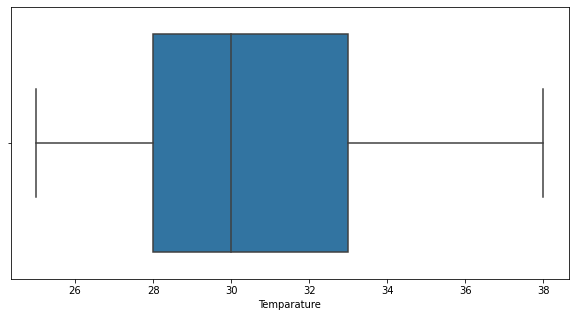

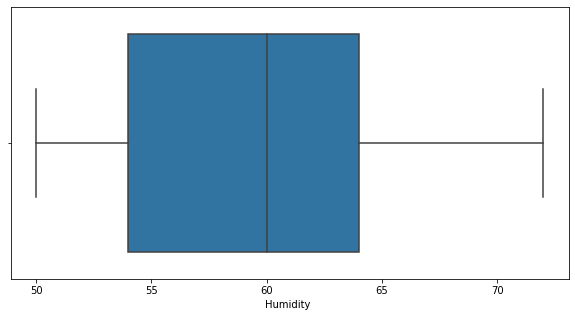

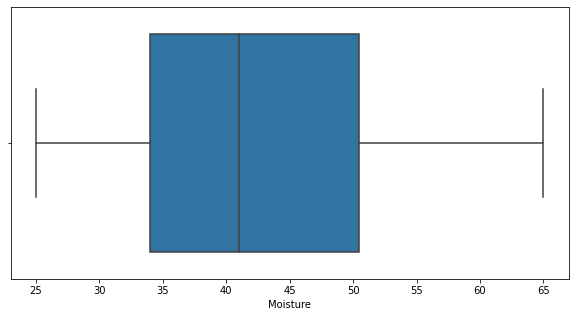

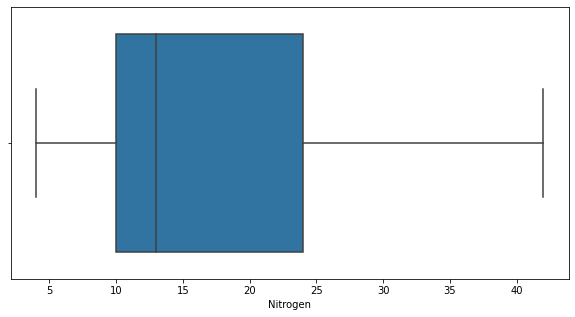

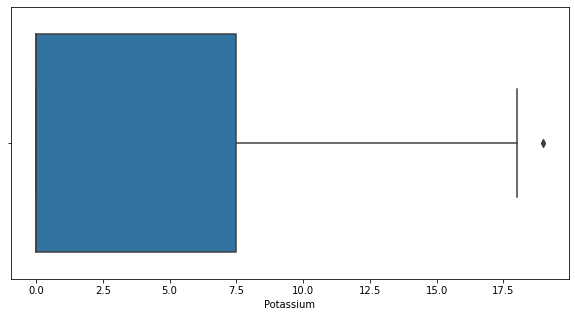

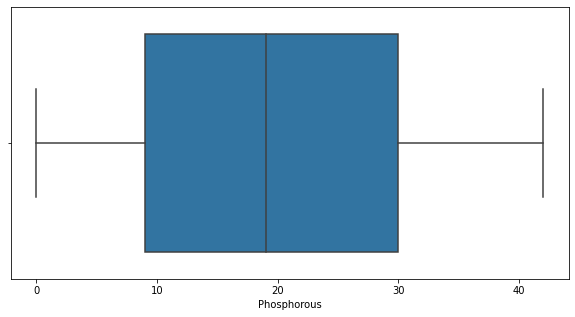

In [21]:
for column in df.columns[0:-1]:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=(column),data=df)

In [22]:
for column in df.columns[0:-1]:
    q1=df[column].quantile(0.25)
    q2=df[column].quantile(0.75)
    IQR=q2-q1
    lower_limit=q1-(1.5*IQR)
    upper_limit=q2+(1.5*IQR)
    df[column]=np.where(df[column]<=lower_limit,lower_limit,df[column])
    df[column]=np.where(df[column]>=upper_limit,upper_limit,df[column])
    
    
    

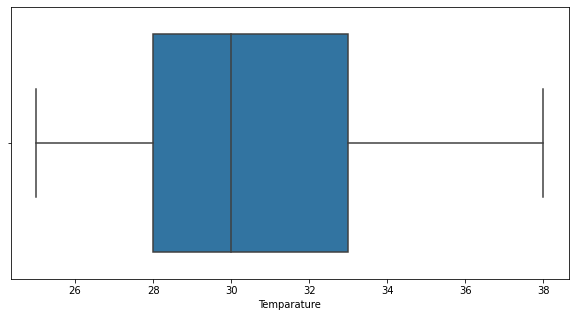

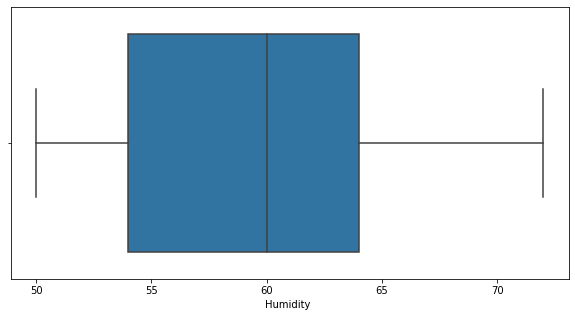

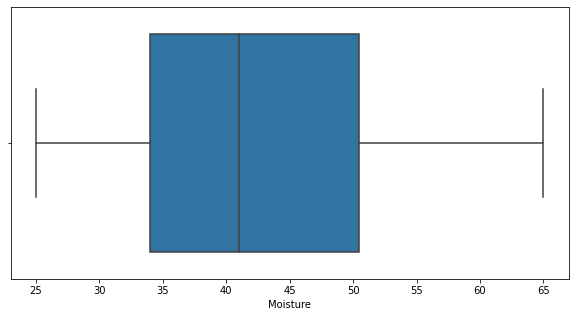

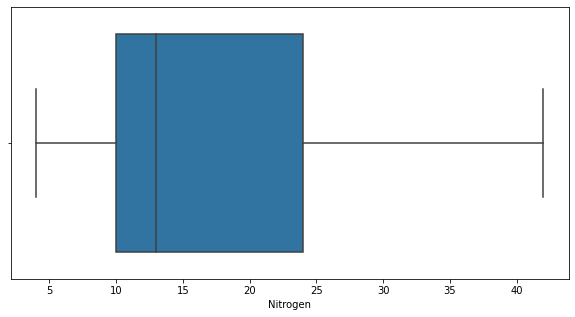

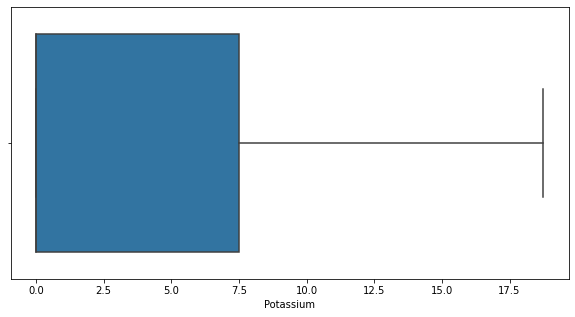

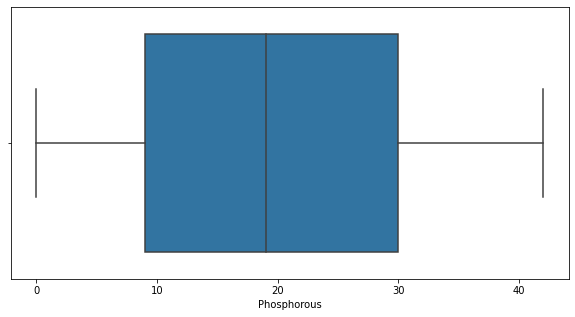

In [23]:
for column in df.columns[0:-1]:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=(column),data=df)

Encoding the catogorical feature columns

In [24]:
X[['Soil Type', 'Crop Type']].nunique()

Soil Type     5
Crop Type    11
dtype: int64

In [25]:
dumm=pd.get_dummies(X[['Soil Type', 'Crop Type']])

In [26]:
dumm

,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,Soil Type_Sandy,Crop Type_Barley,Crop Type_Cotton,Crop Type_Ground Nuts,Crop Type_Maize,Crop Type_Millets,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat
0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
95,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
96,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
97,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [27]:
df=df.join(dumm)

In [28]:
df.head()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,...,Crop Type_Cotton,Crop Type_Ground Nuts,Crop Type_Maize,Crop Type_Millets,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat
0,26.0,52.0,38.0,37.0,0.0,0.0,Urea,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,29.0,52.0,45.0,12.0,0.0,36.0,DAP,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,34.0,65.0,62.0,7.0,9.0,30.0,14-35-14,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,32.0,62.0,34.0,22.0,0.0,20.0,28-28,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28.0,54.0,46.0,35.0,0.0,0.0,Urea,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [29]:
df.corr()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,...,Crop Type_Cotton,Crop Type_Ground Nuts,Crop Type_Maize,Crop Type_Millets,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat
Temparature,1.000000,0.973164,0.091222,-0.033771,-0.023282,0.207545,-0.002751,-0.113037,0.057156,0.107662,...,0.014265,-0.011080,-0.093509,-0.084040,0.000228,0.088228,-0.238837,-0.031557,0.124623,0.256669
Humidity,0.973164,1.000000,0.091342,-0.060646,-0.003594,0.204044,-0.017121,-0.130016,0.050253,0.141787,...,0.027599,-0.000411,-0.079476,-0.114314,-0.000411,0.072020,-0.245254,-0.035872,0.155563,0.251766
Moisture,0.091222,0.091342,1.000000,-0.095945,0.027845,0.009276,0.065288,-0.241463,0.379359,-0.119972,...,0.661839,-0.246924,-0.022992,-0.149034,-0.271521,-0.050269,-0.271455,0.276383,-0.285576,0.192260
Nitrogen,-0.033771,-0.060646,-0.095945,1.000000,-0.500282,-0.686971,0.130520,0.030122,-0.017322,-0.009496,...,-0.080207,0.104605,-0.012672,0.130894,0.002173,0.054920,-0.014786,-0.144648,0.005587,0.121226
Potassium,-0.023282,-0.003594,0.027845,-0.500282,1.000000,0.089409,-0.116420,0.047617,0.030161,0.021345,...,-0.002925,-0.065895,0.100685,-0.206973,-0.052240,0.017203,0.046241,0.057392,0.070653,-0.026841
Phosphorous,0.207545,0.204044,0.009276,-0.686971,0.089409,1.000000,-0.165494,-0.064019,0.000503,0.123352,...,0.144783,0.061002,0.001148,-0.111862,-0.027162,-0.057648,-0.027650,-0.028725,0.013982,-0.098146
Soil Type_Black,-0.002751,-0.017121,0.065288,0.130520,-0.116420,-0.165494,1.000000,-0.245207,-0.252868,-0.237500,...,0.133364,-0.134427,-0.123784,0.154164,0.566009,-0.163357,-0.163357,0.114299,-0.134427,-0.154110
Soil Type_Clayey,-0.113037,-0.130016,-0.241463,0.030122,0.047617,-0.064019,-0.245207,1.000000,-0.261074,-0.245207,...,-0.186867,-0.138789,-0.127801,-0.177892,-0.138789,0.666198,0.666198,-0.195625,-0.138789,-0.159111
Soil Type_Loamy,0.057156,0.050253,0.379359,-0.017322,0.030161,0.000503,-0.252868,-0.261074,1.000000,-0.252868,...,0.034412,-0.143126,-0.131794,-0.183450,-0.143126,-0.173927,-0.173927,0.456679,-0.143126,0.609449
Soil Type_Red,0.107662,0.141787,-0.119972,-0.009496,0.021345,0.123352,-0.237500,-0.245207,-0.252868,1.000000,...,0.211953,0.566009,-0.123784,-0.172301,-0.134427,-0.163357,-0.163357,-0.189476,0.566009,-0.154110


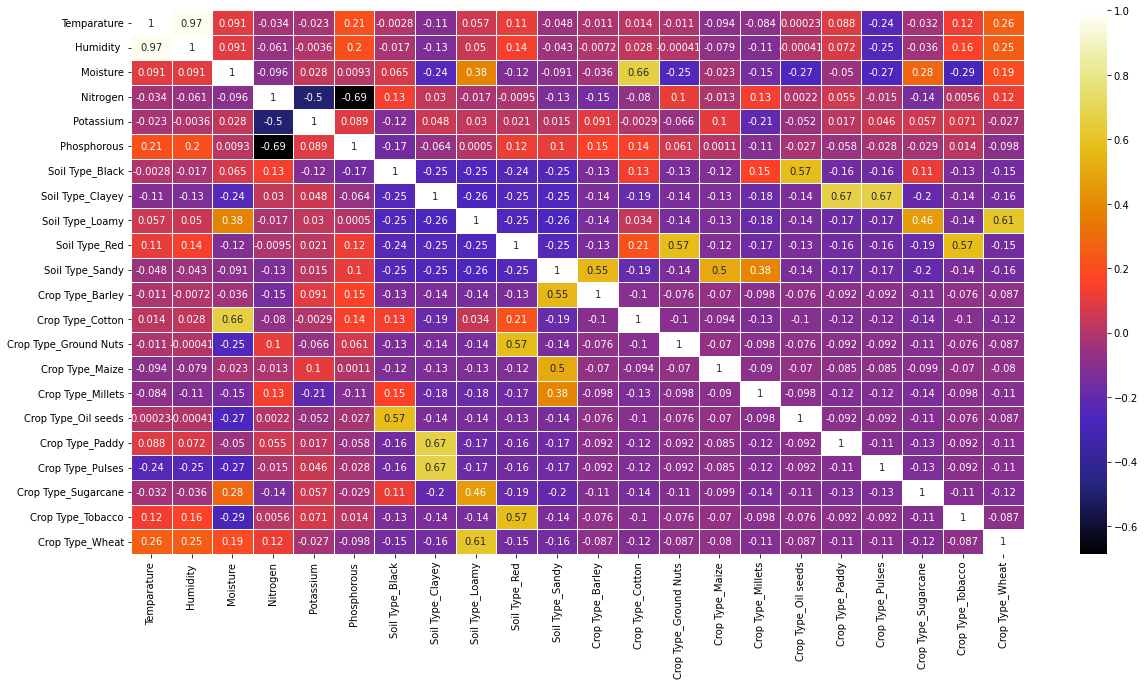

In [30]:
corr=df.corr()
features=corr.index
plt.figure(figsize=(20,10))
ax=sns.heatmap(df[features].corr(),annot=True,linewidth=1, cmap='CMRmap')
plt.show()

TRAIN TEST SPLIT

In [31]:
y= df['Fertilizer Name'].copy()
X= df.drop('Fertilizer Name',axis=1)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [33]:
X_train

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,...,Crop Type_Cotton,Crop Type_Ground Nuts,Crop Type_Maize,Crop Type_Millets,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat
49,33.0,64.0,51.0,5.0,9.00,29.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
70,26.0,52.0,39.0,21.0,0.00,23.0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
68,25.0,50.0,40.0,6.0,18.75,16.0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
15,31.0,62.0,49.0,10.0,13.00,14.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
39,29.0,58.0,34.0,15.0,0.00,37.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,28.0,54.0,41.0,36.0,0.00,0.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
71,31.0,62.0,32.0,39.0,0.00,0.0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14,26.0,52.0,31.0,14.0,0.00,41.0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
92,36.0,68.0,41.0,41.0,0.00,0.0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [34]:
X_test

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,...,Crop Type_Cotton,Crop Type_Ground Nuts,Crop Type_Maize,Crop Type_Millets,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat
62,34.0,65.0,64.0,24.0,0.0,20.0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
40,27.0,54.0,30.0,13.0,0.0,13.0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
95,30.0,60.0,27.0,4.0,17.0,17.0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
18,28.0,54.0,65.0,39.0,0.0,0.0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
97,36.0,60.0,43.0,15.0,0.0,41.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
84,31.0,62.0,44.0,21.0,0.0,28.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64,27.0,53.0,35.0,37.0,0.0,0.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
42,32.0,62.0,34.0,22.0,0.0,24.0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
10,27.0,54.0,28.0,13.0,0.0,40.0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
0,26.0,52.0,38.0,37.0,0.0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [35]:
y_train

49    14-35-14
70       28-28
68    10-26-26
15    17-17-17
39         DAP
        ...   
60        Urea
71        Urea
14         DAP
92        Urea
51       20-20
Name: Fertilizer Name, Length: 79, dtype: object

In [36]:
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

X_train shape: (79, 22)
y_train shape: (79,)
X_test shape: (20, 22)
y_test shape: (20,)


In [37]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
rs.fit(X_train)

RobustScaler()

In [38]:
X_train_scaled =rs.transform(X_train)
X_train_scaled

array([[ 0.6       ,  0.4       ,  0.58823529, ...,  0.        ,
         0.        ,  0.        ],
       [-0.8       , -0.8       , -0.11764706, ...,  0.        ,
         0.        ,  0.        ],
       [-1.        , -1.        , -0.05882353, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.8       , -0.8       , -0.58823529, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.2       ,  0.8       ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.2       ,  0.8       , -0.47058824, ...,  0.        ,
         0.        ,  0.        ]])

In [39]:
X_test_scaled = rs.transform(X_test)
X_test_scaled

array([[ 0.8       ,  0.5       ,  1.35294118,  0.84615385,  0.        ,
         0.09756098,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [-0.6       , -0.6       , -0.64705882,  0.        ,  0.        ,
        -0.24390244,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.82352941, -0.69230769,  2.125     ,
        -0.04878049,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ],
       [-0.4       

In [40]:
y_train.shape

(79,)

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit(y_train)
y_train_encoded = le.transform(y_train)

In [42]:
y_test_encoded = le.transform(y_test)

In [43]:
y_train_encoded

array([1, 4, 0, 2, 5, 1, 1, 6, 2, 5, 4, 4, 5, 5, 2, 1, 3, 6, 6, 4, 4, 6,
       4, 6, 5, 1, 4, 5, 4, 3, 4, 4, 2, 4, 3, 3, 5, 1, 0, 6, 3, 2, 6, 4,
       3, 3, 1, 3, 6, 0, 1, 2, 6, 1, 3, 1, 6, 1, 5, 0, 3, 5, 3, 5, 6, 2,
       1, 6, 6, 1, 5, 0, 5, 3, 6, 6, 5, 6, 3])

In [44]:
y_test_encoded

array([4, 3, 0, 6, 5, 4, 6, 4, 5, 6, 5, 4, 4, 1, 5, 6, 5, 6, 0, 6])

MODEL EVALUATION

In [45]:
## model 1
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train_scaled,y_train_encoded)
print('Training accuracy: ', model1.score(X_train_scaled,y_train_encoded))  

Training accuracy:  1.0


In [46]:
y_pred1 = model1.predict(X_test_scaled)
y_pred1

array([5, 3, 0, 6, 5, 4, 6, 4, 5, 6, 5, 4, 4, 1, 5, 6, 5, 6, 1, 6])

Plot confusion matrix <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f155030e5d0>


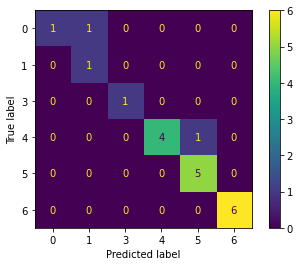

In [47]:
from sklearn.metrics import plot_confusion_matrix, classification_report

print("Plot confusion matrix",plot_confusion_matrix(model1,X_test_scaled,y_test_encoded))

In [48]:
print("Classification Report",classification_report(y_test_encoded,y_pred1))

Classification Report               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1
           3       1.00      1.00      1.00         1
           4       1.00      0.80      0.89         5
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         6

    accuracy                           0.90        20
   macro avg       0.89      0.88      0.86        20
weighted avg       0.93      0.90      0.90        20



In [49]:
## model 2

from sklearn.tree import DecisionTreeClassifier
model_2 = DecisionTreeClassifier()
model_2.fit(X_train_scaled,y_train_encoded)
print('Training accuracy: ',model_2.score(X_train_scaled,y_train_encoded))

Training accuracy:  1.0


In [50]:
y_pred2 = model_2.predict(X_test_scaled)
y_pred2

array([4, 3, 0, 6, 5, 4, 6, 4, 5, 6, 5, 4, 4, 1, 5, 6, 5, 6, 0, 6])

Plot confusion matrix <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f154bc0e510>


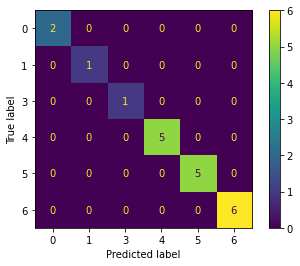

In [51]:
print("Plot confusion matrix",plot_confusion_matrix(model_2,X_test_scaled,y_test_encoded))

In [52]:
print("Classification Report",classification_report(y_test_encoded,y_pred2))

Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [53]:
## model 3
from sklearn.ensemble import RandomForestClassifier
model_3=RandomForestClassifier()
model_3.fit(X_train_scaled,y_train_encoded)
print('Training accuracy: ',model_3.score(X_train_scaled,y_train_encoded))

Training accuracy:  1.0


In [54]:
y_pred3 = model_3.predict(X_test_scaled)
y_pred3

array([4, 3, 0, 6, 5, 4, 6, 4, 5, 6, 5, 4, 4, 1, 5, 6, 5, 6, 2, 6])

Plot confusion matrix <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f154b7c7350>


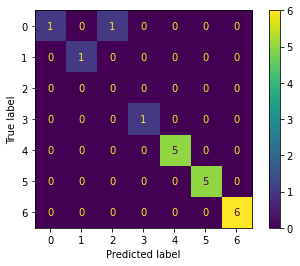

In [55]:
print("Plot confusion matrix",plot_confusion_matrix(model_3,X_test_scaled,y_test_encoded))
    

In [56]:
print("Classification Report",classification_report(y_test_encoded,y_pred3))

Classification Report               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           0.95        20
   macro avg       0.86      0.79      0.81        20
weighted avg       1.00      0.95      0.97        20



In [57]:
## model 4

from sklearn.ensemble import GradientBoostingClassifier
model_4 = GradientBoostingClassifier()
model_4.fit(X_train_scaled,y_train_encoded)
print('Training accuracy: ',model_4.score(X_train_scaled,y_train_encoded))


Training accuracy:  1.0


In [58]:
y_pred4 = model_4.predict(X_test_scaled)
y_pred4

array([4, 3, 0, 6, 5, 4, 6, 4, 5, 6, 5, 4, 4, 1, 1, 6, 5, 6, 0, 6])

Plot confusion matrix <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f154b5c0910>


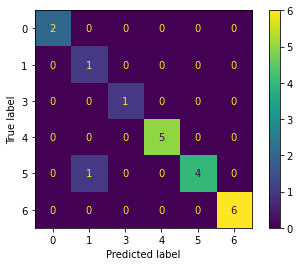

In [59]:
print("Plot confusion matrix",plot_confusion_matrix(model_4,X_test_scaled,y_test_encoded))


In [60]:
print("Classification Report",classification_report(y_test_encoded,y_pred4))

Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.50      1.00      0.67         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      0.80      0.89         5
           6       1.00      1.00      1.00         6

    accuracy                           0.95        20
   macro avg       0.92      0.97      0.93        20
weighted avg       0.97      0.95      0.96        20

